In [131]:
import numpy as np
import pandas as pd
import seaborn as sns
import sklearn
import matplotlib.pyplot as plt

In [132]:
df = pd.read_csv("historical_data.csv")
df.head()

,market_id,created_at,actual_delivery_time,store_id,store_primary_category,order_protocol,total_items,subtotal,num_distinct_items,min_item_price,max_item_price,total_onshift_dashers,total_busy_dashers,total_outstanding_orders,estimated_order_place_duration,estimated_store_to_consumer_driving_duration
0,1.0,2/6/2015 22:24,2/6/2015 23:27,1845,american,1.0,4,3441,4,557,1239,33.0,14.0,21.0,446,861.0
1,2.0,2/10/2015 21:49,2/10/2015 22:56,5477,mexican,2.0,1,1900,1,1400,1400,1.0,2.0,2.0,446,690.0
2,3.0,1/22/2015 20:39,1/22/2015 21:09,5477,NaN,1.0,1,1900,1,1900,1900,1.0,0.0,0.0,446,690.0
3,3.0,2/3/2015 21:21,2/3/2015 22:13,5477,NaN,1.0,6,6900,5,600,1800,1.0,1.0,2.0,446,289.0
4,3.0,2/15/2015 2:40,2/15/2015 3:20,5477,NaN,1.0,3,3900,3,1100,1600,6.0,6.0,9.0,446,650.0


In [133]:
df.describe()

,market_id,store_id,order_protocol,total_items,subtotal,num_distinct_items,min_item_price,max_item_price,total_onshift_dashers,total_busy_dashers,total_outstanding_orders,estimated_order_place_duration,estimated_store_to_consumer_driving_duration
count,196441.000000,197428.000000,196433.000000,197428.000000,197428.000000,197428.000000,197428.000000,197428.000000,181166.000000,181166.000000,181166.000000,197428.000000,196902.000000
mean,2.978706,3530.510272,2.882352,3.196391,2682.331402,2.670791,686.218470,1159.588630,44.808093,41.739747,58.050065,308.560179,545.358935
std,1.524867,2053.496711,1.503771,2.666546,1823.093688,1.630255,522.038648,558.411377,34.526783,32.145733,52.661830,90.139653,219.352902
min,1.000000,1.000000,1.000000,1.000000,0.000000,1.000000,-86.000000,0.000000,-4.000000,-5.000000,-6.000000,0.000000,0.000000
25%,2.000000,1686.000000,1.000000,2.000000,1400.000000,1.000000,299.000000,800.000000,17.000000,15.000000,17.000000,251.000000,382.000000
50%,3.000000,3592.000000,3.000000,3.000000,2200.000000,2.000000,595.000000,1095.000000,37.000000,34.000000,41.000000,251.000000,544.000000
75%,4.000000,5299.000000,4.000000,4.000000,3395.000000,3.000000,949.000000,1395.000000,65.000000,62.000000,85.000000,446.000000,702.000000
max,6.000000,6987.000000,7.000000,411.000000,27100.000000,20.000000,14700.000000,14700.000000,171.000000,154.000000,285.000000,2715.000000,2088.000000


In [134]:
df.shape

(197428, 16)

In [135]:
df.isnull().sum()

market_id                                         987
created_at                                          0
actual_delivery_time                                7
store_id                                            0
store_primary_category                           4760
order_protocol                                    995
total_items                                         0
subtotal                                            0
num_distinct_items                                  0
min_item_price                                      0
max_item_price                                      0
total_onshift_dashers                           16262
total_busy_dashers                              16262
total_outstanding_orders                        16262
estimated_order_place_duration                      0
estimated_store_to_consumer_driving_duration      526
dtype: int64

In [136]:
df.dtypes

market_id                                       float64
created_at                                       object
actual_delivery_time                             object
store_id                                          int64
store_primary_category                           object
order_protocol                                  float64
total_items                                       int64
subtotal                                          int64
num_distinct_items                                int64
min_item_price                                    int64
max_item_price                                    int64
total_onshift_dashers                           float64
total_busy_dashers                              float64
total_outstanding_orders                        float64
estimated_order_place_duration                    int64
estimated_store_to_consumer_driving_duration    float64
dtype: object

In [137]:
df_no_null = df.dropna()

In [138]:
df_no_null.isnull().sum()

market_id                                       0
created_at                                      0
actual_delivery_time                            0
store_id                                        0
store_primary_category                          0
order_protocol                                  0
total_items                                     0
subtotal                                        0
num_distinct_items                              0
min_item_price                                  0
max_item_price                                  0
total_onshift_dashers                           0
total_busy_dashers                              0
total_outstanding_orders                        0
estimated_order_place_duration                  0
estimated_store_to_consumer_driving_duration    0
dtype: int64

In [139]:
df_no_null.shape

(175777, 16)

In [140]:
#Negative values of columns min item price, total onshift dashers, total busy dashers, and total outstanding orders

invalid_rows = df_no_null[(df_no_null["min_item_price"] < 0) | (df_no_null["total_onshift_dashers"] < 0) | (df_no_null["total_busy_dashers"] < 0) | (df_no_null["total_outstanding_orders"] < 0) ]
invalid_rows.head()

,market_id,created_at,actual_delivery_time,store_id,store_primary_category,order_protocol,total_items,subtotal,num_distinct_items,min_item_price,max_item_price,total_onshift_dashers,total_busy_dashers,total_outstanding_orders,estimated_order_place_duration,estimated_store_to_consumer_driving_duration
790,1.0,1/29/2015 2:59,1/29/2015 3:44,132,fast,4.0,3,1003,3,-86,1066,24.0,29.0,38.0,251,721.0
1351,2.0,2/6/2015 5:26,2/6/2015 6:15,6740,fast,4.0,35,1786,4,-1,488,33.0,36.0,52.0,251,587.0
4989,1.0,2/18/2015 0:36,2/18/2015 1:12,1811,smoothie,2.0,2,1940,1,840,856,11.0,14.0,-2.0,251,460.0
6034,3.0,2/14/2015 1:48,2/14/2015 3:00,90,american,1.0,2,3538,2,1238,1606,-2.0,2.0,10.0,446,266.0
7997,1.0,2/8/2015 15:41,2/8/2015 16:35,6172,sandwich,3.0,1,1514,1,1116,1063,1.0,-1.0,3.0,251,650.0


In [141]:
invalid_rows.shape

(90, 16)

In [142]:
#Invalid rows like zero values of subtotal, max_item_price, estimated_order_place_duration, estimated_store_to_consumer_driving_duration

invalid_rows_1 = df_no_null[(df_no_null["subtotal"] == 0) | (df_no_null["max_item_price"] == 0) | (df_no_null["estimated_order_place_duration"] == 0) | (df_no_null["estimated_store_to_consumer_driving_duration"] == 0)]
invalid_rows_1.head()

,market_id,created_at,actual_delivery_time,store_id,store_primary_category,order_protocol,total_items,subtotal,num_distinct_items,min_item_price,max_item_price,total_onshift_dashers,total_busy_dashers,total_outstanding_orders,estimated_order_place_duration,estimated_store_to_consumer_driving_duration
281,4.0,2/8/2015 20:18,2/8/2015 20:49,5081,mediterranean,3.0,2,3090,2,1345,1745,50.0,34.0,42.0,0,428.0
352,4.0,2/4/2015 21:21,2/4/2015 22:46,6395,cafe,2.0,25,10286,14,280,495,41.0,34.0,40.0,0,503.0
1070,4.0,1/25/2015 17:28,1/25/2015 18:03,517,american,3.0,7,0,7,295,1225,6.0,22.0,8.0,251,241.0
1837,2.0,2/7/2015 17:25,2/7/2015 17:55,6740,fast,4.0,5,0,2,169,200,19.0,13.0,13.0,251,512.0
3947,1.0,1/31/2015 1:42,1/31/2015 2:06,414,japanese,3.0,2,0,2,405,1395,16.0,16.0,16.0,251,200.0


In [143]:
invalid_rows_1.shape

(256, 16)

In [144]:
rows_to_drop = invalid_rows.index.union(invalid_rows_1.index)
rows_to_drop

Index([   281,    352,    790,   1070,   1351,   1837,   3947,   4240,   4989,
         6034,
       ...
       190628, 190853, 191717, 192276, 192751, 192887, 193233, 193494, 194290,
       195957],
      dtype='int64', length=346)

In [145]:
df_clean = df_no_null.drop(index=rows_to_drop, errors="ignore")
df_clean.head()

,market_id,created_at,actual_delivery_time,store_id,store_primary_category,order_protocol,total_items,subtotal,num_distinct_items,min_item_price,max_item_price,total_onshift_dashers,total_busy_dashers,total_outstanding_orders,estimated_order_place_duration,estimated_store_to_consumer_driving_duration
0,1.0,2/6/2015 22:24,2/6/2015 23:27,1845,american,1.0,4,3441,4,557,1239,33.0,14.0,21.0,446,861.0
1,2.0,2/10/2015 21:49,2/10/2015 22:56,5477,mexican,2.0,1,1900,1,1400,1400,1.0,2.0,2.0,446,690.0
8,2.0,2/16/2015 0:11,2/16/2015 0:38,5477,indian,3.0,4,4771,3,820,1604,8.0,6.0,18.0,446,289.0
14,1.0,2/12/2015 3:36,2/12/2015 4:14,2841,italian,1.0,1,1525,1,1525,1525,5.0,6.0,8.0,446,795.0
15,1.0,1/27/2015 2:12,1/27/2015 3:02,2841,italian,1.0,2,3620,2,1425,2195,5.0,5.0,7.0,446,205.0


In [146]:
df_clean.shape

(175431, 16)

In [147]:
df_clean.describe()

,market_id,store_id,order_protocol,total_items,subtotal,num_distinct_items,min_item_price,max_item_price,total_onshift_dashers,total_busy_dashers,total_outstanding_orders,estimated_order_place_duration,estimated_store_to_consumer_driving_duration
count,175431.000000,175431.000000,175431.000000,175431.000000,175431.000000,175431.000000,175431.000000,175431.000000,175431.000000,175431.000000,175431.000000,175431.000000,175431.000000
mean,2.743916,3556.296384,2.912399,3.204616,2699.690231,2.675200,684.939201,1160.216182,44.943328,41.884998,58.269451,307.920926,546.102297
std,1.330870,2056.012447,1.513186,2.672358,1827.500441,1.625519,519.849291,560.638892,34.546507,32.168906,52.741544,89.564442,218.685483
min,1.000000,1.000000,1.000000,1.000000,95.000000,1.000000,0.000000,60.000000,0.000000,0.000000,0.000000,10.000000,1.000000
25%,2.000000,1703.000000,1.000000,2.000000,1418.000000,1.000000,299.000000,799.000000,17.000000,15.000000,17.000000,251.000000,384.000000
50%,2.000000,3620.000000,3.000000,3.000000,2225.000000,2.000000,595.000000,1095.000000,37.000000,35.000000,41.000000,251.000000,544.000000
75%,4.000000,5341.000000,4.000000,4.000000,3413.000000,3.000000,942.000000,1395.000000,66.000000,63.000000,85.000000,446.000000,703.000000
max,6.000000,6987.000000,7.000000,411.000000,26800.000000,20.000000,14700.000000,14700.000000,171.000000,154.000000,285.000000,2715.000000,2088.000000


In [148]:
# Drop records with min item price equal to zero.
zero_min_price = df_clean[df_clean["min_item_price"] == 0]
df_clean = df_clean.drop(index = zero_min_price.index, errors="ignore")

In [149]:
df_clean.shape

(173266, 16)

In [150]:
df_clean.describe()

,market_id,store_id,order_protocol,total_items,subtotal,num_distinct_items,min_item_price,max_item_price,total_onshift_dashers,total_busy_dashers,total_outstanding_orders,estimated_order_place_duration,estimated_store_to_consumer_driving_duration
count,173266.000000,173266.000000,173266.000000,173266.000000,173266.000000,173266.000000,173266.000000,173266.000000,173266.000000,173266.000000,173266.000000,173266.000000,173266.000000
mean,2.746286,3556.368416,2.905694,3.124306,2702.575110,2.653031,693.497680,1163.116012,45.014284,41.947941,58.368555,308.188854,546.829897
std,1.330339,2055.475822,1.514190,2.234286,1825.967019,1.609926,517.382586,556.820233,34.565934,32.182130,52.777713,89.682791,218.667430
min,1.000000,1.000000,1.000000,1.000000,95.000000,1.000000,1.000000,60.000000,0.000000,0.000000,0.000000,10.000000,1.000000
25%,2.000000,1703.000000,1.000000,2.000000,1420.250000,1.000000,300.000000,800.000000,17.000000,15.000000,17.000000,251.000000,384.000000
50%,2.000000,3620.000000,3.000000,3.000000,2231.000000,2.000000,599.000000,1095.000000,37.000000,35.000000,41.000000,251.000000,545.000000
75%,4.000000,5339.000000,4.000000,4.000000,3418.000000,3.000000,949.000000,1395.000000,66.000000,63.000000,85.000000,446.000000,704.000000
max,6.000000,6987.000000,7.000000,48.000000,26800.000000,20.000000,14700.000000,14700.000000,171.000000,154.000000,285.000000,2715.000000,2088.000000


<Axes: xlabel='estimated_order_place_duration'>

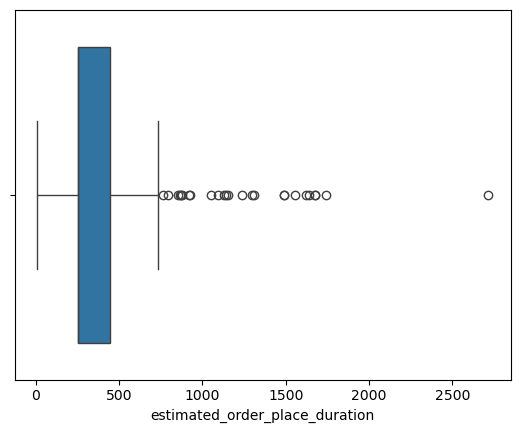

In [151]:
#Identifying outliers

sns.boxplot(x=df_clean['estimated_order_place_duration'])

<Axes: xlabel='estimated_store_to_consumer_driving_duration'>

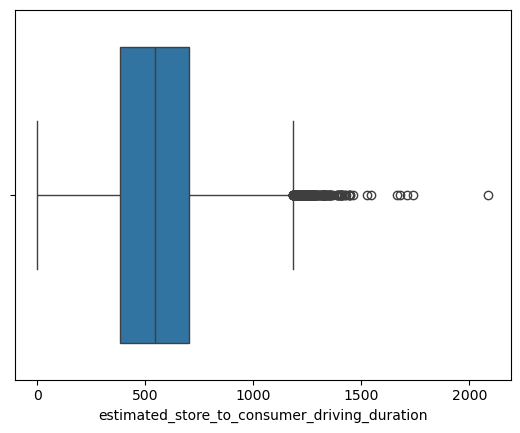

In [152]:
sns.boxplot(x=df_clean['estimated_store_to_consumer_driving_duration'])

(array([1.2323e+04, 4.6650e+04, 6.6617e+04, 5.2022e+04, 1.7178e+04,
        1.9650e+03, 1.4000e+02, 3.0000e+00, 3.0000e+00, 1.0000e+00]),
 array([   0. ,  208.8,  417.6,  626.4,  835.2, 1044. , 1252.8, 1461.6,
        1670.4, 1879.2, 2088. ]),
 <BarContainer object of 10 artists>)

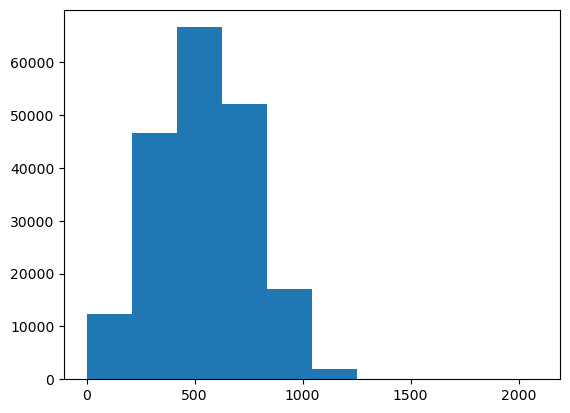

In [153]:
plt.hist(x = df['estimated_store_to_consumer_driving_duration'])

(array([1.39138e+05, 5.82510e+04, 1.30000e+01, 8.00000e+00, 7.00000e+00,
        5.00000e+00, 5.00000e+00, 0.00000e+00, 0.00000e+00, 1.00000e+00]),
 array([   0. ,  271.5,  543. ,  814.5, 1086. , 1357.5, 1629. , 1900.5,
        2172. , 2443.5, 2715. ]),
 <BarContainer object of 10 artists>)

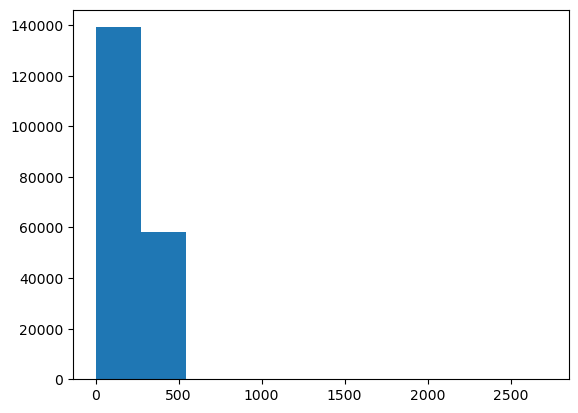

In [154]:
plt.hist(x = df['estimated_order_place_duration'])

In [155]:
df_clean['estimated_store_to_consumer_driving_duration'].quantile(0.99)

np.float64(1046.0)

In [156]:
Q1 = df_clean['estimated_order_place_duration'].quantile(0.25)
Q3 = df_clean['estimated_order_place_duration'].quantile(0.75)
IQR = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

outliers = df[(df['estimated_order_place_duration'] < lower_bound) | (df['estimated_order_place_duration'] > upper_bound)]

In [157]:
outliers.shape

(28, 16)

In [158]:
outliers["estimated_order_place_duration"].describe()

count      28.000000
mean     1288.107143
std       425.278762
min       761.000000
25%       924.000000
50%      1195.500000
75%      1570.500000
max      2715.000000
Name: estimated_order_place_duration, dtype: float64

In [159]:
df_clean = df_clean.drop(index = outliers.index, errors ='ignore')
df_clean.shape

(173241, 16)

In [160]:
df_clean.describe()

,market_id,store_id,order_protocol,total_items,subtotal,num_distinct_items,min_item_price,max_item_price,total_onshift_dashers,total_busy_dashers,total_outstanding_orders,estimated_order_place_duration,estimated_store_to_consumer_driving_duration
count,173241.000000,173241.000000,173241.000000,173241.000000,173241.000000,173241.000000,173241.000000,173241.000000,173241.000000,173241.000000,173241.000000,173241.000000,173241.000000
mean,2.746232,3556.301228,2.905640,3.124353,2702.524241,2.653032,693.472238,1163.085413,45.010990,41.944338,58.360567,308.049284,546.835668
std,1.330357,2055.497457,1.514176,2.234405,1826.047244,1.609989,517.384040,556.823384,34.565158,32.180586,52.773378,88.784725,218.664460
min,1.000000,1.000000,1.000000,1.000000,95.000000,1.000000,1.000000,60.000000,0.000000,0.000000,0.000000,10.000000,1.000000
25%,2.000000,1703.000000,1.000000,2.000000,1420.000000,1.000000,300.000000,800.000000,17.000000,15.000000,17.000000,251.000000,384.000000
50%,2.000000,3620.000000,3.000000,3.000000,2230.000000,2.000000,599.000000,1095.000000,37.000000,35.000000,41.000000,251.000000,545.000000
75%,4.000000,5339.000000,4.000000,4.000000,3417.000000,3.000000,949.000000,1395.000000,66.000000,63.000000,85.000000,446.000000,704.000000
max,6.000000,6987.000000,7.000000,48.000000,26800.000000,20.000000,14700.000000,14700.000000,171.000000,154.000000,285.000000,732.000000,2088.000000


In [161]:
df_clean.dtypes

market_id                                       float64
created_at                                       object
actual_delivery_time                             object
store_id                                          int64
store_primary_category                           object
order_protocol                                  float64
total_items                                       int64
subtotal                                          int64
num_distinct_items                                int64
min_item_price                                    int64
max_item_price                                    int64
total_onshift_dashers                           float64
total_busy_dashers                              float64
total_outstanding_orders                        float64
estimated_order_place_duration                    int64
estimated_store_to_consumer_driving_duration    float64
dtype: object

In [162]:
#Feature Engineering

#1. Delivery Duration

dta = df_clean
dta['created_at'] = pd.to_datetime(dta['created_at'])
dta['actual_delivery_time'] = pd.to_datetime(dta['actual_delivery_time'])
dta['delivery_duration'] = (dta['actual_delivery_time'] - dta['created_at']).dt.total_seconds()
dta.head()

,market_id,created_at,actual_delivery_time,store_id,store_primary_category,order_protocol,total_items,subtotal,num_distinct_items,min_item_price,max_item_price,total_onshift_dashers,total_busy_dashers,total_outstanding_orders,estimated_order_place_duration,estimated_store_to_consumer_driving_duration,delivery_duration
0,1.0,2015-02-06 22:24:00,2015-02-06 23:27:00,1845,american,1.0,4,3441,4,557,1239,33.0,14.0,21.0,446,861.0,3780.0
1,2.0,2015-02-10 21:49:00,2015-02-10 22:56:00,5477,mexican,2.0,1,1900,1,1400,1400,1.0,2.0,2.0,446,690.0,4020.0
8,2.0,2015-02-16 00:11:00,2015-02-16 00:38:00,5477,indian,3.0,4,4771,3,820,1604,8.0,6.0,18.0,446,289.0,1620.0
14,1.0,2015-02-12 03:36:00,2015-02-12 04:14:00,2841,italian,1.0,1,1525,1,1525,1525,5.0,6.0,8.0,446,795.0,2280.0
15,1.0,2015-01-27 02:12:00,2015-01-27 03:02:00,2841,italian,1.0,2,3620,2,1425,2195,5.0,5.0,7.0,446,205.0,3000.0


In [163]:
dta['delivery_duration'].describe()

count    173241.000000
mean       2867.293539
std        1667.428932
min         120.000000
25%        2100.000000
50%        2640.000000
75%        3360.000000
max      373860.000000
Name: delivery_duration, dtype: float64

<Axes: xlabel='delivery_duration'>

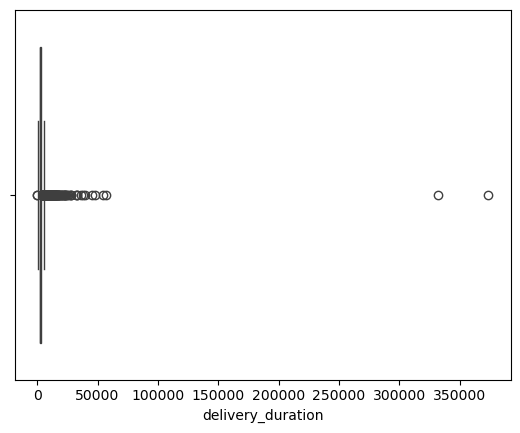

In [164]:
sns.boxplot(x = dta['delivery_duration'])

In [165]:
#Outliers of delivery duration

q1 = dta['delivery_duration'].quantile(0.25)
q3 = dta['delivery_duration'].quantile(0.75)
iqr = q3 - q1
lb = q1 - 1.5 * iqr
ub = q3 + 1.5 * iqr
dd_outliers = dta[(dta['delivery_duration'] < lb) | (dta['delivery_duration'] > ub)]

In [166]:
dta = dta.drop(index = dd_outliers.index, errors = "ignore")

In [167]:
dta.shape

(167500, 17)

<Axes: xlabel='delivery_duration'>

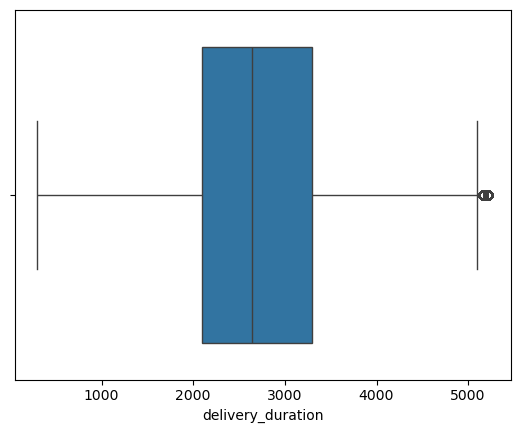

In [168]:
sns.boxplot(x = dta['delivery_duration'])

In [169]:
dta.describe()

,market_id,created_at,actual_delivery_time,store_id,order_protocol,total_items,subtotal,num_distinct_items,min_item_price,max_item_price,total_onshift_dashers,total_busy_dashers,total_outstanding_orders,estimated_order_place_duration,estimated_store_to_consumer_driving_duration,delivery_duration
count,167500.000000,167500,167500,167500.000000,167500.000000,167500.000000,167500.000000,167500.000000,167500.000000,167500.000000,167500.000000,167500.000000,167500.000000,167500.000000,167500.00000,167500.000000
mean,2.758842,2015-02-04 19:20:18.132895232,2015-02-04 20:05:57.806328320,3559.045487,2.911887,3.105296,2679.963284,2.638287,692.979875,1158.973540,45.192973,42.062113,58.138000,307.212925,544.19800,2739.673433
min,1.000000,2015-01-21 15:22:00,2015-01-21 16:16:00,1.000000,1.000000,1.000000,95.000000,1.000000,1.000000,60.000000,0.000000,0.000000,0.000000,10.000000,3.00000,300.000000
25%,2.000000,2015-01-29 00:10:00,2015-01-29 00:54:00,1703.000000,1.000000,2.000000,1408.000000,1.000000,300.000000,799.000000,17.000000,15.000000,17.000000,251.000000,382.00000,2100.000000
50%,2.000000,2015-02-05 02:55:00,2015-02-05 03:52:00,3620.000000,3.000000,3.000000,2209.000000,2.000000,599.000000,1095.000000,37.000000,35.000000,41.000000,251.000000,543.00000,2640.000000
75%,4.000000,2015-02-12 00:50:00,2015-02-12 01:30:00,5341.000000,4.000000,4.000000,3397.000000,3.000000,949.000000,1395.000000,66.000000,63.000000,85.000000,446.000000,701.00000,3300.000000
max,6.000000,2015-02-18 06:00:00,2015-02-18 07:07:00,6987.000000,7.000000,48.000000,26800.000000,20.000000,14700.000000,14700.000000,171.000000,154.000000,285.000000,732.000000,1711.00000,5220.000000
std,1.326714,NaN,NaN,2055.838510,1.512615,2.208776,1800.223445,1.593090,515.525467,553.379338,34.529013,32.135146,52.455203,88.401365,218.00289,879.525362


In [170]:
#2. Estimated prep/cook time

dta['estimated_prep_time'] = dta['delivery_duration'] - (dta['estimated_order_place_duration'] + dta['estimated_store_to_consumer_driving_duration'])
dta['estimated_prep_time'].describe()

count    167500.000000
mean       1888.262507
std         844.996919
min        -635.000000
25%        1256.000000
50%        1766.000000
75%        2411.000000
max        4840.000000
Name: estimated_prep_time, dtype: float64

In [171]:
drop_rows = dta[dta['estimated_prep_time'] < 0]

In [172]:
dta = dta.drop(index = drop_rows.index, errors = "ignore")

In [173]:
#3. Price range

dta['price_range'] = dta['max_item_price'] - dta['min_item_price']
drop_rows = dta[dta['price_range'] < 0]
dta = dta.drop(index = drop_rows.index, errors = "ignore")

In [174]:
dta['price_range'].describe()

count    166765.000000
mean        468.146218
std         509.739717
min           0.000000
25%           0.000000
50%         360.000000
75%         750.000000
max        8400.000000
Name: price_range, dtype: float64

In [175]:
#4. Average item range

dta['avg_item_price'] = dta['subtotal'] / dta['total_items']

In [176]:
dta.describe()

,market_id,created_at,actual_delivery_time,store_id,order_protocol,total_items,subtotal,num_distinct_items,min_item_price,max_item_price,total_onshift_dashers,total_busy_dashers,total_outstanding_orders,estimated_order_place_duration,estimated_store_to_consumer_driving_duration,delivery_duration,estimated_prep_time,price_range,avg_item_price
count,166765.000000,166765,166765,166765.000000,166765.000000,166765.000000,166765.000000,166765.000000,166765.000000,166765.000000,166765.000000,166765.000000,166765.000000,166765.000000,166765.000000,166765.000000,166765.000000,166765.000000,166765.000000
mean,2.759056,2015-02-04 19:19:18.049470720,2015-02-04 20:04:58.787875072,3559.068306,2.911774,3.111894,2683.397080,2.644296,690.760345,1158.906563,45.195683,42.061979,58.142302,307.202261,544.143381,2740.738404,1889.392762,468.146218,978.883694
min,1.000000,2015-01-21 15:22:00,2015-01-21 16:16:00,1.000000,1.000000,1.000000,95.000000,1.000000,1.000000,60.000000,0.000000,0.000000,0.000000,10.000000,3.000000,540.000000,4.000000,0.000000,17.375000
25%,2.000000,2015-01-29 00:09:00,2015-01-29 00:52:00,1703.000000,1.000000,2.000000,1415.000000,1.000000,300.000000,799.000000,17.000000,15.000000,17.000000,251.000000,382.000000,2100.000000,1257.000000,0.000000,650.000000
50%,2.000000,2015-02-05 02:55:00,2015-02-05 03:52:00,3620.000000,3.000000,3.000000,2217.000000,2.000000,599.000000,1095.000000,37.000000,35.000000,41.000000,251.000000,543.000000,2640.000000,1767.000000,360.000000,896.250000
75%,4.000000,2015-02-12 00:51:00,2015-02-12 01:32:00,5341.000000,4.000000,4.000000,3400.000000,3.000000,947.000000,1395.000000,66.000000,63.000000,85.000000,446.000000,701.000000,3300.000000,2411.000000,750.000000,1195.000000
max,6.000000,2015-02-18 06:00:00,2015-02-18 07:07:00,6987.000000,7.000000,48.000000,26800.000000,20.000000,14700.000000,14700.000000,171.000000,154.000000,285.000000,732.000000,1711.000000,5220.000000,4840.000000,8400.000000,14700.000000
std,1.326747,NaN,NaN,2055.656759,1.512314,2.209677,1802.219956,1.593381,513.718226,552.936030,34.538766,32.141622,52.466237,88.396712,218.007583,878.832920,844.136862,509.739717,508.409076


In [177]:
dta.dtypes

market_id                                              float64
created_at                                      datetime64[ns]
actual_delivery_time                            datetime64[ns]
store_id                                                 int64
store_primary_category                                  object
order_protocol                                         float64
total_items                                              int64
subtotal                                                 int64
num_distinct_items                                       int64
min_item_price                                           int64
max_item_price                                           int64
total_onshift_dashers                                  float64
total_busy_dashers                                     float64
total_outstanding_orders                               float64
estimated_order_place_duration                           int64
estimated_store_to_consumer_driving_duration           

In [178]:
dta = dta.drop(columns = ['max_item_price','min_item_price','total_items','subtotal','created_at','actual_delivery_time'])

In [179]:
dta.describe()

,market_id,store_id,order_protocol,num_distinct_items,total_onshift_dashers,total_busy_dashers,total_outstanding_orders,estimated_order_place_duration,estimated_store_to_consumer_driving_duration,delivery_duration,estimated_prep_time,price_range,avg_item_price
count,166765.000000,166765.000000,166765.000000,166765.000000,166765.000000,166765.000000,166765.000000,166765.000000,166765.000000,166765.000000,166765.000000,166765.000000,166765.000000
mean,2.759056,3559.068306,2.911774,2.644296,45.195683,42.061979,58.142302,307.202261,544.143381,2740.738404,1889.392762,468.146218,978.883694
std,1.326747,2055.656759,1.512314,1.593381,34.538766,32.141622,52.466237,88.396712,218.007583,878.832920,844.136862,509.739717,508.409076
min,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,10.000000,3.000000,540.000000,4.000000,0.000000,17.375000
25%,2.000000,1703.000000,1.000000,1.000000,17.000000,15.000000,17.000000,251.000000,382.000000,2100.000000,1257.000000,0.000000,650.000000
50%,2.000000,3620.000000,3.000000,2.000000,37.000000,35.000000,41.000000,251.000000,543.000000,2640.000000,1767.000000,360.000000,896.250000
75%,4.000000,5341.000000,4.000000,3.000000,66.000000,63.000000,85.000000,446.000000,701.000000,3300.000000,2411.000000,750.000000,1195.000000
max,6.000000,6987.000000,7.000000,20.000000,171.000000,154.000000,285.000000,732.000000,1711.000000,5220.000000,4840.000000,8400.000000,14700.000000


<Axes: >

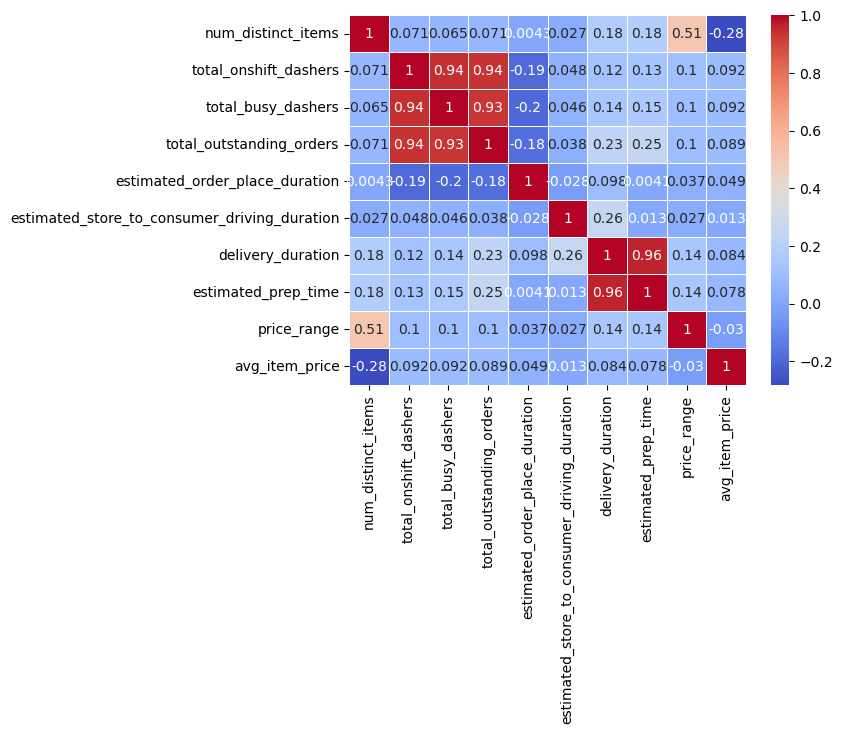

In [180]:
#Heatmap

dta_hm = dta.drop(columns = ['market_id','store_id','order_protocol','store_primary_category'])

corr_matrix = dta_hm.corr()
sns.heatmap(corr_matrix, annot=True, cmap = "coolwarm", linewidths = 0.5)

In [181]:
#Drop highly correlated variables

dta = dta.drop(columns=['estimated_prep_time','total_outstanding_orders','num_distinct_items'])

<Axes: >

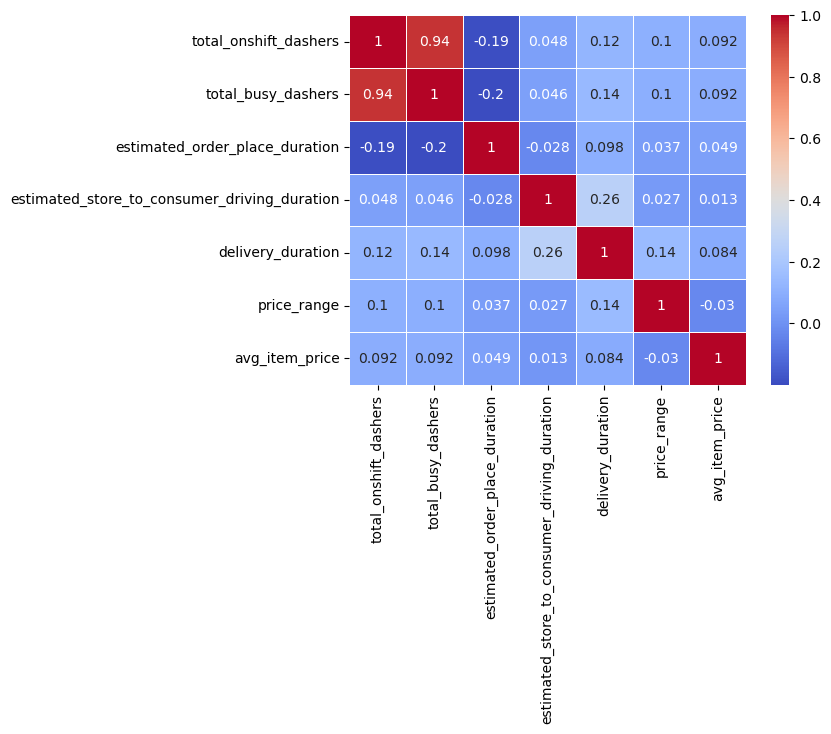

In [182]:
dta_hm = dta.drop(columns = ['market_id','store_id','order_protocol','store_primary_category'])

corr_matrix = dta_hm.corr()
sns.heatmap(corr_matrix, annot=True, cmap = "coolwarm", linewidths = 0.5)

In [183]:
#5. Busy_dashers_ratio

dta['busy_dashers_ratio'] = dta['total_busy_dashers']/dta['total_onshift_dashers']

In [184]:
dta['busy_dashers_ratio'].describe()

count    1.636170e+05
mean              inf
std               NaN
min      0.000000e+00
25%      8.235294e-01
50%      9.600000e-01
75%      1.000000e+00
max               inf
Name: busy_dashers_ratio, dtype: float64

In [185]:
dta['busy_dashers_ratio'] = dta['busy_dashers_ratio'].replace([np.inf, -np.inf], 0)

In [186]:
dta['busy_dashers_ratio'] = dta['busy_dashers_ratio'].replace(['NaN'], 0)

In [187]:
dta = dta.drop(columns = ['total_onshift_dashers','total_busy_dashers'])

<Axes: >

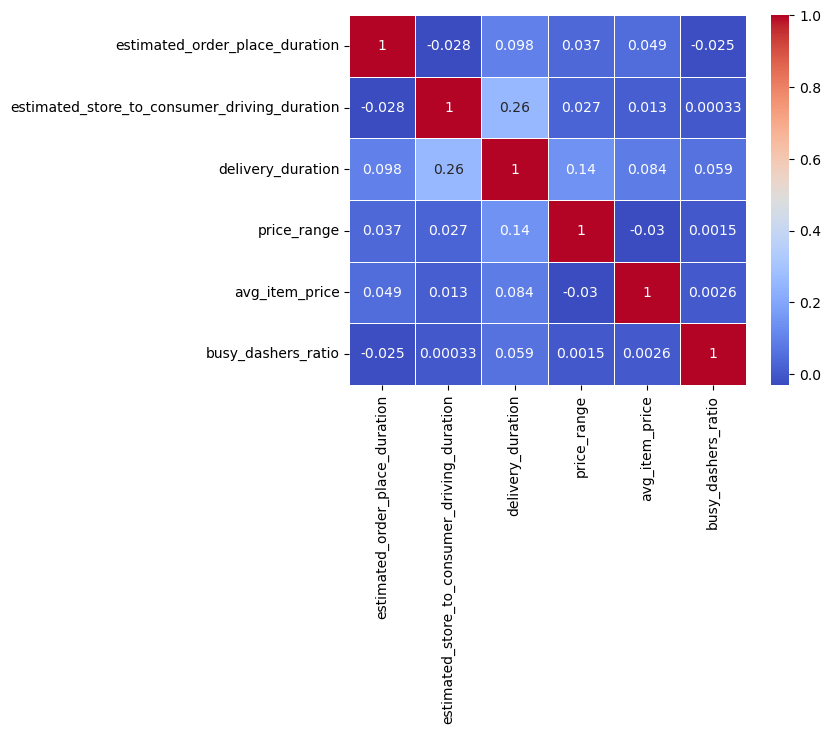

In [188]:
dta_hm = dta.drop(columns = ['market_id','store_id','order_protocol','store_primary_category'])

corr_matrix = dta_hm.corr()
sns.heatmap(corr_matrix, annot=True, cmap = "coolwarm", linewidths = 0.5)

In [189]:
dta.columns

Index(['market_id', 'store_id', 'store_primary_category', 'order_protocol',
       'estimated_order_place_duration',
       'estimated_store_to_consumer_driving_duration', 'delivery_duration',
       'price_range', 'avg_item_price', 'busy_dashers_ratio'],
      dtype='object')

In [190]:
dta['market_id'].unique()

array([1., 2., 3., 4., 5., 6.])

In [191]:
dta['store_id'].nunique()

5595

In [192]:
dta['store_primary_category'].nunique()

73

In [193]:
dta['order_protocol'].unique()

array([1., 2., 3., 5., 4., 6., 7.])

In [194]:
dummies = pd.get_dummies(dta['market_id'], prefix='market_id', drop_first=True)
dta = pd.concat([dta, dummies], axis=1)

In [195]:
dta = dta.drop(columns = ['market_id'])

In [196]:
dummies_2 = pd.get_dummies(dta['order_protocol'], prefix='order_protocol', drop_first=True)
dta = pd.concat([dta, dummies_2], axis=1)

In [197]:
dta = dta.drop(columns = ['order_protocol'])

In [198]:
dta.dtypes

store_id                                          int64
store_primary_category                           object
estimated_order_place_duration                    int64
estimated_store_to_consumer_driving_duration    float64
delivery_duration                               float64
price_range                                       int64
avg_item_price                                  float64
busy_dashers_ratio                              float64
market_id_2.0                                      bool
market_id_3.0                                      bool
market_id_4.0                                      bool
market_id_5.0                                      bool
market_id_6.0                                      bool
order_protocol_2.0                                 bool
order_protocol_3.0                                 bool
order_protocol_4.0                                 bool
order_protocol_5.0                                 bool
order_protocol_6.0                              

In [199]:
# Calculate the mean delivery duration for each store
store_means = dta.groupby('store_id')['delivery_duration'].mean()

# Map these means back to the original dataframe
dta['store_id_encoded'] = dta['store_id'].map(store_means)

In [200]:
dta.describe()

,store_id,estimated_order_place_duration,estimated_store_to_consumer_driving_duration,delivery_duration,price_range,avg_item_price,busy_dashers_ratio,store_id_encoded
count,166765.000000,166765.000000,166765.000000,166765.000000,166765.000000,166765.000000,163617.000000,166765.000000
mean,3559.068306,307.202261,544.143381,2740.738404,468.146218,978.883694,0.948757,2740.738404
std,2055.656759,88.396712,218.007583,878.832920,509.739717,508.409076,0.394938,360.497645
min,1.000000,10.000000,3.000000,540.000000,0.000000,17.375000,0.000000,1080.000000
25%,1703.000000,251.000000,382.000000,2100.000000,0.000000,650.000000,0.823529,2486.936416
50%,3620.000000,251.000000,543.000000,2640.000000,360.000000,896.250000,0.960000,2713.655172
75%,5341.000000,446.000000,701.000000,3300.000000,750.000000,1195.000000,1.000000,2961.818182
max,6987.000000,732.000000,1711.000000,5220.000000,8400.000000,14700.000000,31.000000,5220.000000


In [201]:
dta = dta.drop(columns = ['store_id'])

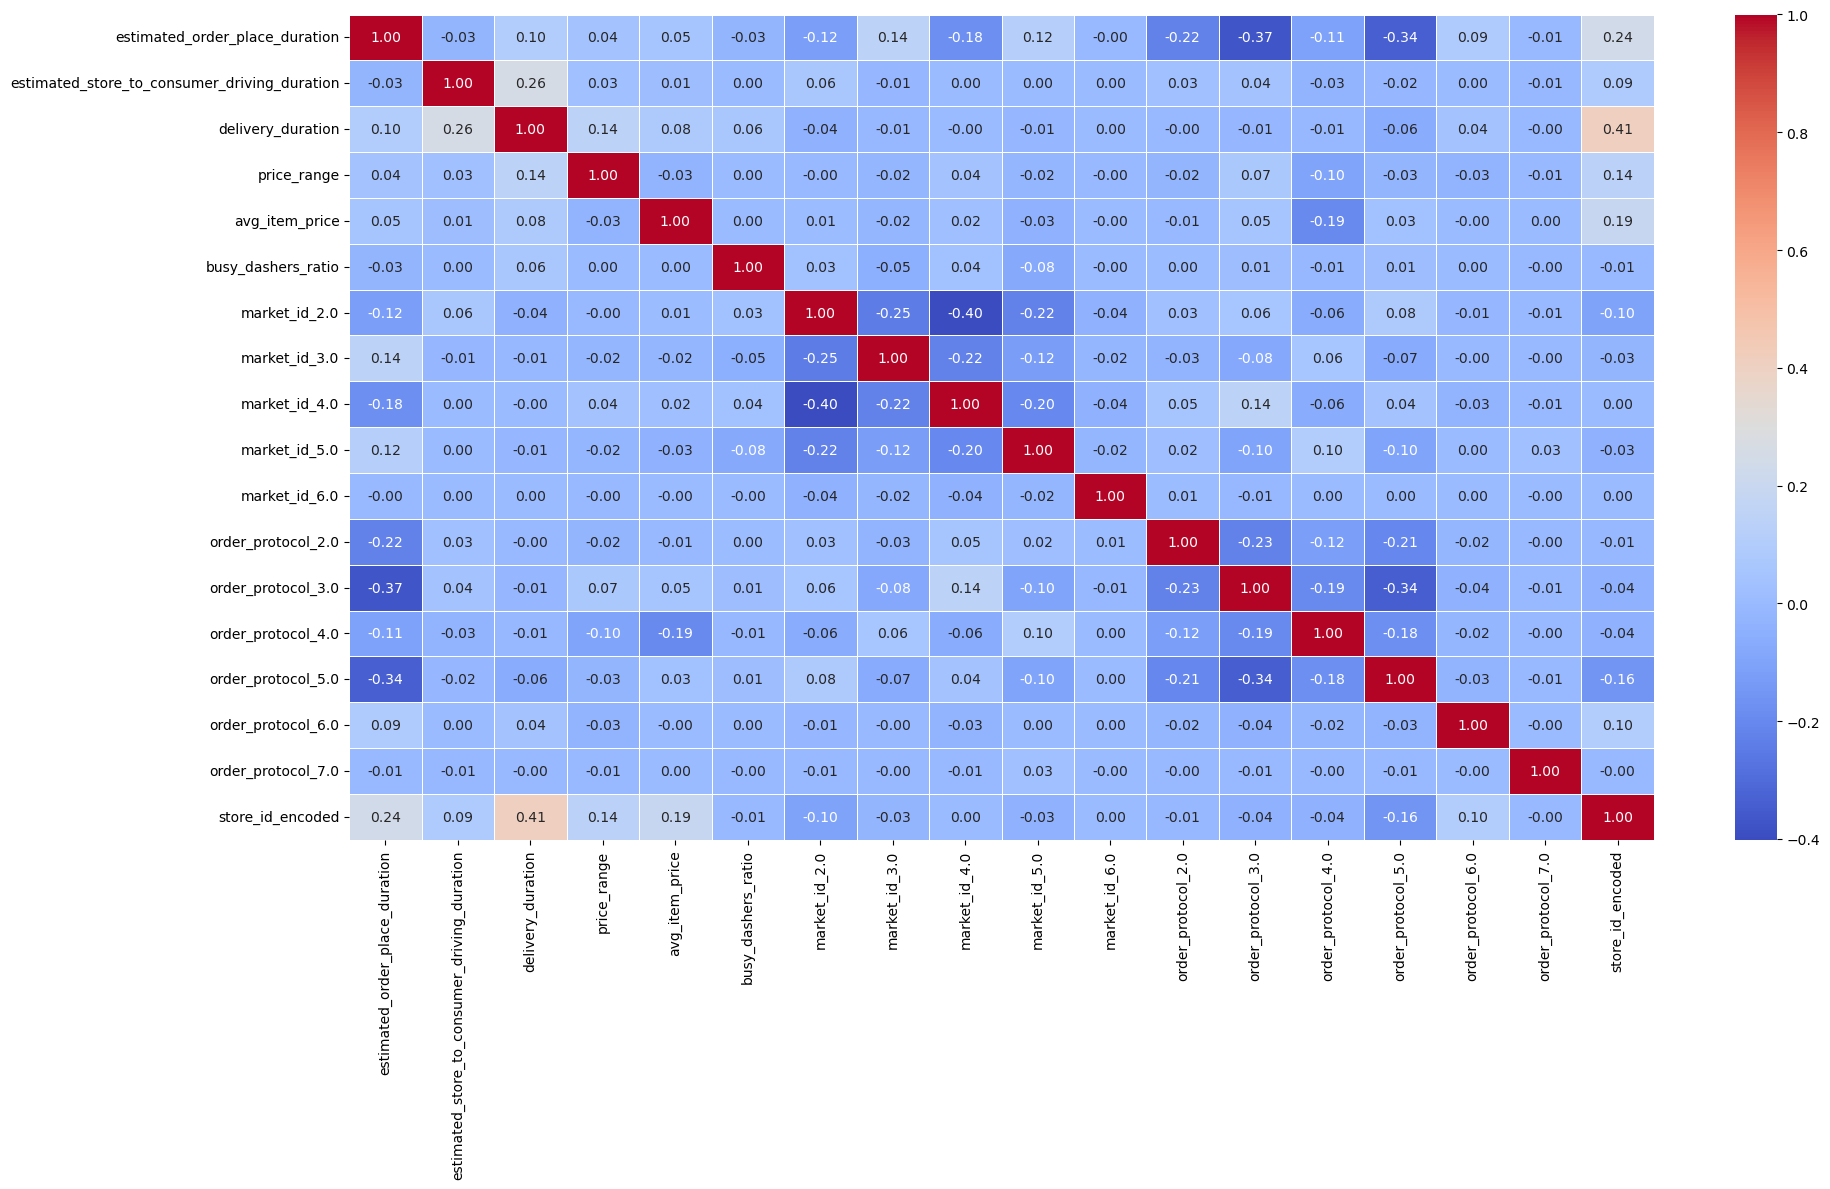

In [202]:
dta_hm = dta.drop(columns = ['store_primary_category'])
plt.figure(figsize = (20,12))
corr_matrix = dta_hm.corr()
sns.heatmap(corr_matrix, annot=True, cmap = "coolwarm", linewidths = 0.5, fmt=".2f")
plt.tight_layout()

In [203]:
dta['store_primary_category'].unique()

array(['american', 'mexican', 'indian', 'italian', 'sandwich', 'thai',
       'cafe', 'salad', 'pizza', 'chinese', 'singaporean', 'burger',
       'mediterranean', 'japanese', 'greek', 'catering', 'filipino',
       'convenience-store', 'other', 'vegan', 'asian', 'barbecue',
       'breakfast', 'fast', 'dessert', 'smoothie', 'seafood',
       'vietnamese', 'cajun', 'steak', 'middle-eastern', 'persian',
       'korean', 'sushi', 'latin-american', 'chocolate', 'burmese',
       'british', 'nepalese', 'hawaiian', 'pasta', 'alcohol',
       'vegetarian', 'dim-sum', 'peruvian', 'turkish', 'ethiopian',
       'bubble-tea', 'german', 'french', 'caribbean', 'gluten-free',
       'comfort-food', 'gastropub', 'afghan', 'pakistani', 'moroccan',
       'tapas', 'malaysian', 'soup', 'brazilian', 'european', 'cheese',
       'african', 'argentine', 'kosher', 'irish', 'spanish', 'russian',
       'southern', 'lebanese', 'belgian', 'alcohol-plus-food'],
      dtype=object)

In [204]:
# 1. Define the super-category mapping
category_mapping = {
    # ASIAN
    'indian': 'Asian', 'thai': 'Asian', 'chinese': 'Asian', 'singaporean': 'Asian',
    'japanese': 'Asian', 'filipino': 'Asian', 'asian': 'Asian', 'vietnamese': 'Asian',
    'korean': 'Asian', 'sushi': 'Asian', 'burmese': 'Asian', 'nepalese': 'Asian',
    'dim-sum': 'Asian', 'malaysian': 'Asian', 'bubble-tea': 'Asian',

    # AMERICAS
    'american': 'Americas', 'mexican': 'Americas', 'latin-american': 'Americas',
    'peruvian': 'Americas', 'brazilian': 'Americas', 'argentine': 'Americas',
    'caribbean': 'Americas', 'southern': 'Americas', 'cajun': 'Americas',

    # EUROPEAN
    'italian': 'European', 'greek': 'European', 'british': 'European', 'pasta': 'European',
    'german': 'European', 'french': 'European', 'spanish': 'European', 'russian': 'European',
    'belgian': 'European', 'irish': 'European', 'european': 'European',

    # MIDDLE EASTERN & AFRICAN
    'mediterranean': 'ME_Africa', 'middle-eastern': 'ME_Africa', 'persian': 'ME_Africa',
    'turkish': 'ME_Africa', 'ethiopian': 'ME_Africa', 'afghan': 'ME_Africa',
    'pakistani': 'ME_Africa', 'moroccan': 'ME_Africa', 'african': 'ME_Africa',
    'lebanese': 'ME_Africa',

    # FAST FOOD & CONVENIENCE
    'burger': 'Fast_Food', 'fast': 'Fast_Food', 'sandwich': 'Fast_Food',
    'pizza': 'Fast_Food', 'convenience-store': 'Fast_Food',

    # CAFE & DESSERT
    'cafe': 'Cafe_Dessert', 'dessert': 'Cafe_Dessert', 'smoothie': 'Cafe_Dessert',
    'chocolate': 'Cafe_Dessert', 'breakfast': 'Cafe_Dessert',

    # HEALTH & DIETARY
    'salad': 'Health_Specialty', 'vegan': 'Health_Specialty', 'vegetarian': 'Health_Specialty',
    'gluten-free': 'Health_Specialty', 'kosher': 'Health_Specialty',

    # ALCOHOL & BAR
    'alcohol': 'Alcohol_Bar', 'alcohol-plus-food': 'Alcohol_Bar', 
    'gastropub': 'Alcohol_Bar', 'tapas': 'Alcohol_Bar',

    # MEAT & SEAFOOD
    'steak': 'Meat_Seafood', 'seafood': 'Meat_Seafood', 'barbecue': 'Meat_Seafood',

    # OTHER / GENERAL
    'other': 'Other', 'comfort-food': 'Other', 'soup': 'Other',
    'cheese': 'Other', 'catering': 'Other', 'hawaiian': 'Other'
}

# 2. Map the existing column to the new super categories
dta['store_category_grouped'] = dta['store_primary_category'].map(category_mapping)

# 3. Fill any missing values (NaNs or unmapped categories) with 'Other'
dta['store_category_grouped'] = dta['store_category_grouped'].fillna('Other')

# 4. Create Dummies
# Setting drop_first=True prevents the "Dummy Variable Trap" (multicollinearity)
dta_final = pd.get_dummies(dta, columns=['store_category_grouped'], drop_first=True)

In [205]:
dta['store_category_grouped'].unique()

array(['Americas', 'Asian', 'European', 'Fast_Food', 'Cafe_Dessert',
       'Health_Specialty', 'ME_Africa', 'Other', 'Meat_Seafood',
       'Alcohol_Bar'], dtype=object)

In [206]:
dta = dta.drop(columns = 'store_primary_category')

In [207]:
dummies = pd.get_dummies(dta['store_category_grouped'], drop_first=True)
dta = pd.concat([dta, dummies], axis=1)

In [208]:
dta.head()

,estimated_order_place_duration,estimated_store_to_consumer_driving_duration,delivery_duration,price_range,avg_item_price,busy_dashers_ratio,market_id_2.0,market_id_3.0,market_id_4.0,market_id_5.0,...,store_category_grouped,Americas,Asian,Cafe_Dessert,European,Fast_Food,Health_Specialty,ME_Africa,Meat_Seafood,Other
0,446,861.0,3780.0,682,860.25,0.424242,False,False,False,False,...,Americas,True,False,False,False,False,False,False,False,False
1,446,690.0,4020.0,0,1900.00,2.000000,True,False,False,False,...,Americas,True,False,False,False,False,False,False,False,False
8,446,289.0,1620.0,784,1192.75,0.750000,True,False,False,False,...,Asian,False,True,False,False,False,False,False,False,False
14,446,795.0,2280.0,0,1525.00,1.200000,False,False,False,False,...,European,False,False,False,True,False,False,False,False,False
15,446,205.0,3000.0,770,1810.00,1.000000,False,False,False,False,...,European,False,False,False,True,False,False,False,False,False


In [209]:
dta = dta.drop(columns = 'store_category_grouped')

In [210]:
dta.dtypes

estimated_order_place_duration                    int64
estimated_store_to_consumer_driving_duration    float64
delivery_duration                               float64
price_range                                       int64
avg_item_price                                  float64
busy_dashers_ratio                              float64
market_id_2.0                                      bool
market_id_3.0                                      bool
market_id_4.0                                      bool
market_id_5.0                                      bool
market_id_6.0                                      bool
order_protocol_2.0                                 bool
order_protocol_3.0                                 bool
order_protocol_4.0                                 bool
order_protocol_5.0                                 bool
order_protocol_6.0                                 bool
order_protocol_7.0                                 bool
store_id_encoded                                

In [211]:
dta.isnull().sum()

estimated_order_place_duration                     0
estimated_store_to_consumer_driving_duration       0
delivery_duration                                  0
price_range                                        0
avg_item_price                                     0
busy_dashers_ratio                              3148
market_id_2.0                                      0
market_id_3.0                                      0
market_id_4.0                                      0
market_id_5.0                                      0
market_id_6.0                                      0
order_protocol_2.0                                 0
order_protocol_3.0                                 0
order_protocol_4.0                                 0
order_protocol_5.0                                 0
order_protocol_6.0                                 0
order_protocol_7.0                                 0
store_id_encoded                                   0
Americas                                      

In [212]:
dta['busy_dashers_ratio'].describe()

count    163617.000000
mean          0.948757
std           0.394938
min           0.000000
25%           0.823529
50%           0.960000
75%           1.000000
max          31.000000
Name: busy_dashers_ratio, dtype: float64

In [213]:
data = dta.dropna(subset=['busy_dashers_ratio'])

In [214]:
dta.shape

(166765, 27)

In [215]:
data.shape

(163617, 27)

In [216]:
#Linear Regression

from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.metrics import mean_absolute_error

X = data.drop(columns = "delivery_duration")
y = data['delivery_duration']

X_train,X_test,y_train,y_test = train_test_split(X,y,test_size = 0.3, random_state = 42)

model=LinearRegression()
model.fit(X_train, y_train)

y_pred = model.predict(X_test)

print("R2_Score:", r2_score(y_test,y_pred))
print("MSE:", mean_squared_error(y_test, y_pred))
print("MAE:", mean_absolute_error(y_test, y_pred))
print("Intercept:", model.intercept_)
print("Coeffcients:", model.coef_)

R2_Score: 0.22894981183072693
MSE: 592619.2006575171
MAE: 610.3442905713687
Intercept: -601.6101367700785
Coeffcients: [ 3.57881332e-01  9.16269509e-01  1.59503553e-01  3.56796000e-02
  1.46180900e+02 -5.54923170e+01 -2.22592259e+01 -3.58337757e+01
 -2.57712323e+01  4.53214003e+00  5.38656878e+01  2.80403439e+01
  1.19916068e+02  5.87402324e+01  3.95528250e+01 -1.49394356e+01
  9.01906015e-01  2.17503805e+00  4.55801869e-01  8.20342260e+00
  6.55426843e+00  2.04697273e+01  1.99334416e+01 -6.30790952e+00
 -4.13832089e+01  1.95556927e+01]


In [217]:
#Random Forest

from sklearn.ensemble import RandomForestRegressor

X = dta.drop(columns = "delivery_duration")
y = dta['delivery_duration']

X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.3,random_state=42)

rf_model = RandomForestRegressor(n_estimators=50, random_state = 42)
rf_model.fit(X_train,y_train)

y_pred = rf_model.predict(X_test)

print("R2_Score:", r2_score(y_test,y_pred))
print("MSE:", mean_squared_error(y_test, y_pred))
print("MAE:", mean_absolute_error(y_test, y_pred))

R2_Score: 0.2220977730820245
MSE: 605449.4589852672
MAE: 616.826358870392


In [218]:
df_no_null.head()

,market_id,created_at,actual_delivery_time,store_id,store_primary_category,order_protocol,total_items,subtotal,num_distinct_items,min_item_price,max_item_price,total_onshift_dashers,total_busy_dashers,total_outstanding_orders,estimated_order_place_duration,estimated_store_to_consumer_driving_duration
0,1.0,2/6/2015 22:24,2/6/2015 23:27,1845,american,1.0,4,3441,4,557,1239,33.0,14.0,21.0,446,861.0
1,2.0,2/10/2015 21:49,2/10/2015 22:56,5477,mexican,2.0,1,1900,1,1400,1400,1.0,2.0,2.0,446,690.0
8,2.0,2/16/2015 0:11,2/16/2015 0:38,5477,indian,3.0,4,4771,3,820,1604,8.0,6.0,18.0,446,289.0
14,1.0,2/12/2015 3:36,2/12/2015 4:14,2841,italian,1.0,1,1525,1,1525,1525,5.0,6.0,8.0,446,795.0
15,1.0,1/27/2015 2:12,1/27/2015 3:02,2841,italian,1.0,2,3620,2,1425,2195,5.0,5.0,7.0,446,205.0


In [219]:
df_no_null.isnull().sum()

market_id                                       0
created_at                                      0
actual_delivery_time                            0
store_id                                        0
store_primary_category                          0
order_protocol                                  0
total_items                                     0
subtotal                                        0
num_distinct_items                              0
min_item_price                                  0
max_item_price                                  0
total_onshift_dashers                           0
total_busy_dashers                              0
total_outstanding_orders                        0
estimated_order_place_duration                  0
estimated_store_to_consumer_driving_duration    0
dtype: int64

In [220]:
df_no_null.describe()

,market_id,store_id,order_protocol,total_items,subtotal,num_distinct_items,min_item_price,max_item_price,total_onshift_dashers,total_busy_dashers,total_outstanding_orders,estimated_order_place_duration,estimated_store_to_consumer_driving_duration
count,175777.000000,175777.000000,175777.000000,175777.000000,175777.000000,175777.000000,175777.000000,175777.000000,175777.000000,175777.000000,175777.000000,175777.000000,175777.000000
mean,2.743726,3556.299561,2.911752,3.204976,2697.111147,2.675060,684.965433,1160.158616,44.918664,41.861381,58.230115,307.818105,546.077240
std,1.330963,2055.959006,1.513128,2.674055,1828.554893,1.625681,519.882924,560.828571,34.544724,32.168505,52.731043,89.796587,218.717798
min,1.000000,1.000000,1.000000,1.000000,0.000000,1.000000,-86.000000,0.000000,-4.000000,-5.000000,-6.000000,0.000000,0.000000
25%,2.000000,1703.000000,1.000000,2.000000,1412.000000,1.000000,299.000000,799.000000,17.000000,15.000000,17.000000,251.000000,384.000000
50%,2.000000,3620.000000,3.000000,3.000000,2224.000000,2.000000,595.000000,1095.000000,37.000000,35.000000,41.000000,251.000000,544.000000
75%,4.000000,5341.000000,4.000000,4.000000,3410.000000,3.000000,942.000000,1395.000000,66.000000,63.000000,85.000000,446.000000,703.000000
max,6.000000,6987.000000,7.000000,411.000000,26800.000000,20.000000,14700.000000,14700.000000,171.000000,154.000000,285.000000,2715.000000,2088.000000


In [221]:
invalid_records = df_no_null[(df_no_null['min_item_price'] <= 0) | (df_no_null['total_onshift_dashers'] < 0) | (df_no_null['total_busy_dashers'] < 0) | (df_no_null['total_outstanding_orders'] < 0) | (df_no_null['subtotal'] == 0) | (df_no_null['max_item_price'] == 0) | (df_no_null['estimated_order_place_duration'] == 0) | (df_no_null['estimated_store_to_consumer_driving_duration'] == 0)]

In [222]:
invalid_records.shape

(2511, 16)

In [223]:
df2 = df_no_null.drop(index = invalid_records.index, errors ='ignore')

In [224]:
df2.shape

(173266, 16)

In [225]:
df2.dtypes

market_id                                       float64
created_at                                       object
actual_delivery_time                             object
store_id                                          int64
store_primary_category                           object
order_protocol                                  float64
total_items                                       int64
subtotal                                          int64
num_distinct_items                                int64
min_item_price                                    int64
max_item_price                                    int64
total_onshift_dashers                           float64
total_busy_dashers                              float64
total_outstanding_orders                        float64
estimated_order_place_duration                    int64
estimated_store_to_consumer_driving_duration    float64
dtype: object

In [226]:
df2['created_at'] = pd.to_datetime(df2['created_at'])
df2['actual_delivery_time'] = pd.to_datetime(df2['actual_delivery_time'])
df2['delivery_duration'] = (df2['actual_delivery_time'] - df2['created_at']).dt.total_seconds()
df2['average_item_price'] = df2['subtotal'] / df2['total_items']
df2['price_range'] = df2['max_item_price'] - df2['min_item_price']
df2['busy_dashers_ratio'] = df2['total_busy_dashers'] /df2['total_onshift_dashers']

In [227]:
df2.describe()

,market_id,created_at,actual_delivery_time,store_id,order_protocol,total_items,subtotal,num_distinct_items,min_item_price,max_item_price,total_onshift_dashers,total_busy_dashers,total_outstanding_orders,estimated_order_place_duration,estimated_store_to_consumer_driving_duration,delivery_duration,average_item_price,price_range,busy_dashers_ratio
count,173266.000000,173266,173266,173266.000000,173266.000000,173266.000000,173266.000000,173266.000000,173266.000000,173266.000000,173266.000000,173266.000000,173266.000000,173266.000000,173266.000000,173266.000000,173266.000000,173266.000000,1.698160e+05
mean,2.746286,2015-02-04 19:50:26.071704576,2015-02-04 20:38:13.474080256,3556.368416,2.905694,3.124306,2702.575110,2.653031,693.497680,1163.116012,45.014284,41.947941,58.368555,308.188854,546.829897,2867.402376,982.931603,469.618333,inf
min,1.000000,2015-01-21 15:22:00,2015-01-21 16:16:00,1.000000,1.000000,1.000000,95.000000,1.000000,1.000000,60.000000,0.000000,0.000000,0.000000,10.000000,1.000000,120.000000,17.375000,-197.000000,0.000000e+00
25%,2.000000,2015-01-29 01:28:00,2015-01-29 02:15:00,1703.000000,1.000000,2.000000,1420.250000,1.000000,300.000000,800.000000,17.000000,15.000000,17.000000,251.000000,384.000000,2100.000000,650.062500,0.000000,8.285714e-01
50%,2.000000,2015-02-05 02:37:00,2015-02-05 03:41:00,3620.000000,3.000000,3.000000,2231.000000,2.000000,599.000000,1095.000000,37.000000,35.000000,41.000000,251.000000,545.000000,2640.000000,899.000000,362.500000,9.629630e-01
75%,4.000000,2015-02-12 01:03:00,2015-02-12 01:46:00,5339.000000,4.000000,4.000000,3418.000000,3.000000,949.000000,1395.000000,66.000000,63.000000,85.000000,446.000000,704.000000,3360.000000,1195.000000,750.000000,1.000000e+00
max,6.000000,2015-02-18 06:00:00,2015-02-19 22:45:00,6987.000000,7.000000,48.000000,26800.000000,20.000000,14700.000000,14700.000000,171.000000,154.000000,285.000000,2715.000000,2088.000000,373860.000000,14700.000000,8400.000000,inf
std,1.330339,NaN,NaN,2055.475822,1.514190,2.234286,1825.967019,1.609926,517.382586,556.820233,34.565934,32.182130,52.777713,89.682791,218.667430,1667.372974,512.724988,512.026105,NaN


In [228]:
rows_to_drop = df2[df2['price_range'] < 0]
df2 = df2.drop(index = rows_to_drop.index, errors = 'ignore')

In [229]:
df2['busy_dashers_ratio'] = df2['busy_dashers_ratio'].replace([np.inf, -np.inf], 0)
df2['busy_dashers_ratio'] = df2['busy_dashers_ratio'].replace(['NaN'], 0)

In [230]:
df2.describe()

,market_id,created_at,actual_delivery_time,store_id,order_protocol,total_items,subtotal,num_distinct_items,min_item_price,max_item_price,total_onshift_dashers,total_busy_dashers,total_outstanding_orders,estimated_order_place_duration,estimated_store_to_consumer_driving_duration,delivery_duration,average_item_price,price_range,busy_dashers_ratio
count,172577.000000,172577,172577,172577.000000,172577.000000,172577.000000,172577.000000,172577.000000,172577.000000,172577.000000,172577.000000,172577.000000,172577.000000,172577.000000,172577.000000,172577.000000,172577.000000,172577.000000,169127.000000
mean,2.746467,2015-02-04 19:48:31.198248192,2015-02-04 20:36:19.178221824,3556.398535,2.905596,3.130620,2705.783407,2.658796,691.333526,1163.003743,45.014330,41.945821,58.366416,308.179891,546.823754,2867.979974,981.074483,471.670217,0.950972
min,1.000000,2015-01-21 15:22:00,2015-01-21 16:16:00,1.000000,1.000000,1.000000,95.000000,1.000000,1.000000,60.000000,0.000000,0.000000,0.000000,10.000000,1.000000,120.000000,17.375000,0.000000,0.000000
25%,2.000000,2015-01-29 01:28:00,2015-01-29 02:14:00,1703.000000,1.000000,2.000000,1425.000000,1.000000,300.000000,800.000000,17.000000,15.000000,17.000000,251.000000,384.000000,2100.000000,650.000000,0.000000,0.828125
50%,2.000000,2015-02-05 02:37:00,2015-02-05 03:40:00,3620.000000,3.000000,3.000000,2240.000000,2.000000,597.000000,1095.000000,37.000000,35.000000,41.000000,251.000000,545.000000,2640.000000,898.000000,370.000000,0.962963
75%,4.000000,2015-02-12 01:03:00,2015-02-12 01:46:00,5339.000000,4.000000,4.000000,3425.000000,3.000000,945.000000,1395.000000,66.000000,63.000000,85.000000,446.000000,704.000000,3360.000000,1195.000000,750.000000,1.000000
max,6.000000,2015-02-18 06:00:00,2015-02-19 22:45:00,6987.000000,7.000000,48.000000,26800.000000,20.000000,14700.000000,14700.000000,171.000000,154.000000,285.000000,2715.000000,2088.000000,373860.000000,14700.000000,8400.000000,31.000000
std,1.330321,NaN,NaN,2055.306875,1.513923,2.235103,1827.899405,1.610166,515.612256,556.379389,34.572664,32.186890,52.785236,89.682361,218.696587,1669.312780,510.835915,512.008903,0.402399


In [231]:
df2 = df2.drop(columns = ['created_at','actual_delivery_time','total_items','subtotal','min_item_price','max_item_price','total_onshift_dashers','total_busy_dashers'])

In [232]:
df2.columns

Index(['market_id', 'store_id', 'store_primary_category', 'order_protocol',
       'num_distinct_items', 'total_outstanding_orders',
       'estimated_order_place_duration',
       'estimated_store_to_consumer_driving_duration', 'delivery_duration',
       'average_item_price', 'price_range', 'busy_dashers_ratio'],
      dtype='object')

In [233]:
dummies = pd.get_dummies(df['order_protocol'], prefix = 'order_protocol',drop_first = True)
df2 = pd.concat([df2,dummies], axis =1)

In [234]:
store_means = df2.groupby('store_id')['delivery_duration'].mean()

df2['store_id_encoded'] = df2['store_id'].map(store_means)
df2 = df2.drop(columns = ['store_id','market_id','order_protocol'])

In [235]:
df2.head()

,store_primary_category,num_distinct_items,total_outstanding_orders,estimated_order_place_duration,estimated_store_to_consumer_driving_duration,delivery_duration,average_item_price,price_range,busy_dashers_ratio,order_protocol_2.0,order_protocol_3.0,order_protocol_4.0,order_protocol_5.0,order_protocol_6.0,order_protocol_7.0,store_id_encoded
0,american,4.0,21.0,446.0,861.0,3780.0,860.25,682.0,0.424242,False,False,False,False,False,False,3780.0
1,mexican,1.0,2.0,446.0,690.0,4020.0,1900.00,0.0,2.000000,True,False,False,False,False,False,2820.0
8,indian,3.0,18.0,446.0,289.0,1620.0,1192.75,784.0,0.750000,False,True,False,False,False,False,2820.0
14,italian,1.0,8.0,446.0,795.0,2280.0,1525.00,0.0,1.200000,False,False,False,False,False,False,3972.0
15,italian,2.0,7.0,446.0,205.0,3000.0,1810.00,770.0,1.000000,False,False,False,False,False,False,3972.0


In [236]:
# 1. Define the super-category mapping
category_mapping = {
    # ASIAN
    'indian': 'Asian', 'thai': 'Asian', 'chinese': 'Asian', 'singaporean': 'Asian',
    'japanese': 'Asian', 'filipino': 'Asian', 'asian': 'Asian', 'vietnamese': 'Asian',
    'korean': 'Asian', 'sushi': 'Asian', 'burmese': 'Asian', 'nepalese': 'Asian',
    'dim-sum': 'Asian', 'malaysian': 'Asian', 'bubble-tea': 'Asian',

    # AMERICAS
    'american': 'Americas', 'mexican': 'Americas', 'latin-american': 'Americas',
    'peruvian': 'Americas', 'brazilian': 'Americas', 'argentine': 'Americas',
    'caribbean': 'Americas', 'southern': 'Americas', 'cajun': 'Americas',

    # EUROPEAN
    'italian': 'European', 'greek': 'European', 'british': 'European', 'pasta': 'European',
    'german': 'European', 'french': 'European', 'spanish': 'European', 'russian': 'European',
    'belgian': 'European', 'irish': 'European', 'european': 'European',

    # MIDDLE EASTERN & AFRICAN
    'mediterranean': 'ME_Africa', 'middle-eastern': 'ME_Africa', 'persian': 'ME_Africa',
    'turkish': 'ME_Africa', 'ethiopian': 'ME_Africa', 'afghan': 'ME_Africa',
    'pakistani': 'ME_Africa', 'moroccan': 'ME_Africa', 'african': 'ME_Africa',
    'lebanese': 'ME_Africa',

    # FAST FOOD & CONVENIENCE
    'burger': 'Fast_Food', 'fast': 'Fast_Food', 'sandwich': 'Fast_Food',
    'pizza': 'Fast_Food', 'convenience-store': 'Fast_Food',

    # CAFE & DESSERT
    'cafe': 'Cafe_Dessert', 'dessert': 'Cafe_Dessert', 'smoothie': 'Cafe_Dessert',
    'chocolate': 'Cafe_Dessert', 'breakfast': 'Cafe_Dessert',

    # HEALTH & DIETARY
    'salad': 'Health_Specialty', 'vegan': 'Health_Specialty', 'vegetarian': 'Health_Specialty',
    'gluten-free': 'Health_Specialty', 'kosher': 'Health_Specialty',

    # ALCOHOL & BAR
    'alcohol': 'Alcohol_Bar', 'alcohol-plus-food': 'Alcohol_Bar', 
    'gastropub': 'Alcohol_Bar', 'tapas': 'Alcohol_Bar',

    # MEAT & SEAFOOD
    'steak': 'Meat_Seafood', 'seafood': 'Meat_Seafood', 'barbecue': 'Meat_Seafood',

    # OTHER / GENERAL
    'other': 'Other', 'comfort-food': 'Other', 'soup': 'Other',
    'cheese': 'Other', 'catering': 'Other', 'hawaiian': 'Other'
}

# 2. Map the existing column to the new super categories
df2['store_category_grouped'] = df2['store_primary_category'].map(category_mapping)

# 3. Fill any missing values (NaNs or unmapped categories) with 'Other'
df2['store_category_grouped'] = df2['store_category_grouped'].fillna('Other')

# 4. Create Dummies
# Setting drop_first=True prevents the "Dummy Variable Trap" (multicollinearity)
df2 = pd.get_dummies(df2, columns=['store_category_grouped'], drop_first=True)

In [237]:
df2 = df2.drop(columns = ['store_primary_category'])

In [238]:
df2.head()

,num_distinct_items,total_outstanding_orders,estimated_order_place_duration,estimated_store_to_consumer_driving_duration,delivery_duration,average_item_price,price_range,busy_dashers_ratio,order_protocol_2.0,order_protocol_3.0,...,store_id_encoded,store_category_grouped_Americas,store_category_grouped_Asian,store_category_grouped_Cafe_Dessert,store_category_grouped_European,store_category_grouped_Fast_Food,store_category_grouped_Health_Specialty,store_category_grouped_ME_Africa,store_category_grouped_Meat_Seafood,store_category_grouped_Other
0,4.0,21.0,446.0,861.0,3780.0,860.25,682.0,0.424242,False,False,...,3780.0,True,False,False,False,False,False,False,False,False
1,1.0,2.0,446.0,690.0,4020.0,1900.00,0.0,2.000000,True,False,...,2820.0,True,False,False,False,False,False,False,False,False
8,3.0,18.0,446.0,289.0,1620.0,1192.75,784.0,0.750000,False,True,...,2820.0,False,True,False,False,False,False,False,False,False
14,1.0,8.0,446.0,795.0,2280.0,1525.00,0.0,1.200000,False,False,...,3972.0,False,False,False,True,False,False,False,False,False
15,2.0,7.0,446.0,205.0,3000.0,1810.00,770.0,1.000000,False,False,...,3972.0,False,False,False,True,False,False,False,False,False


<Axes: >

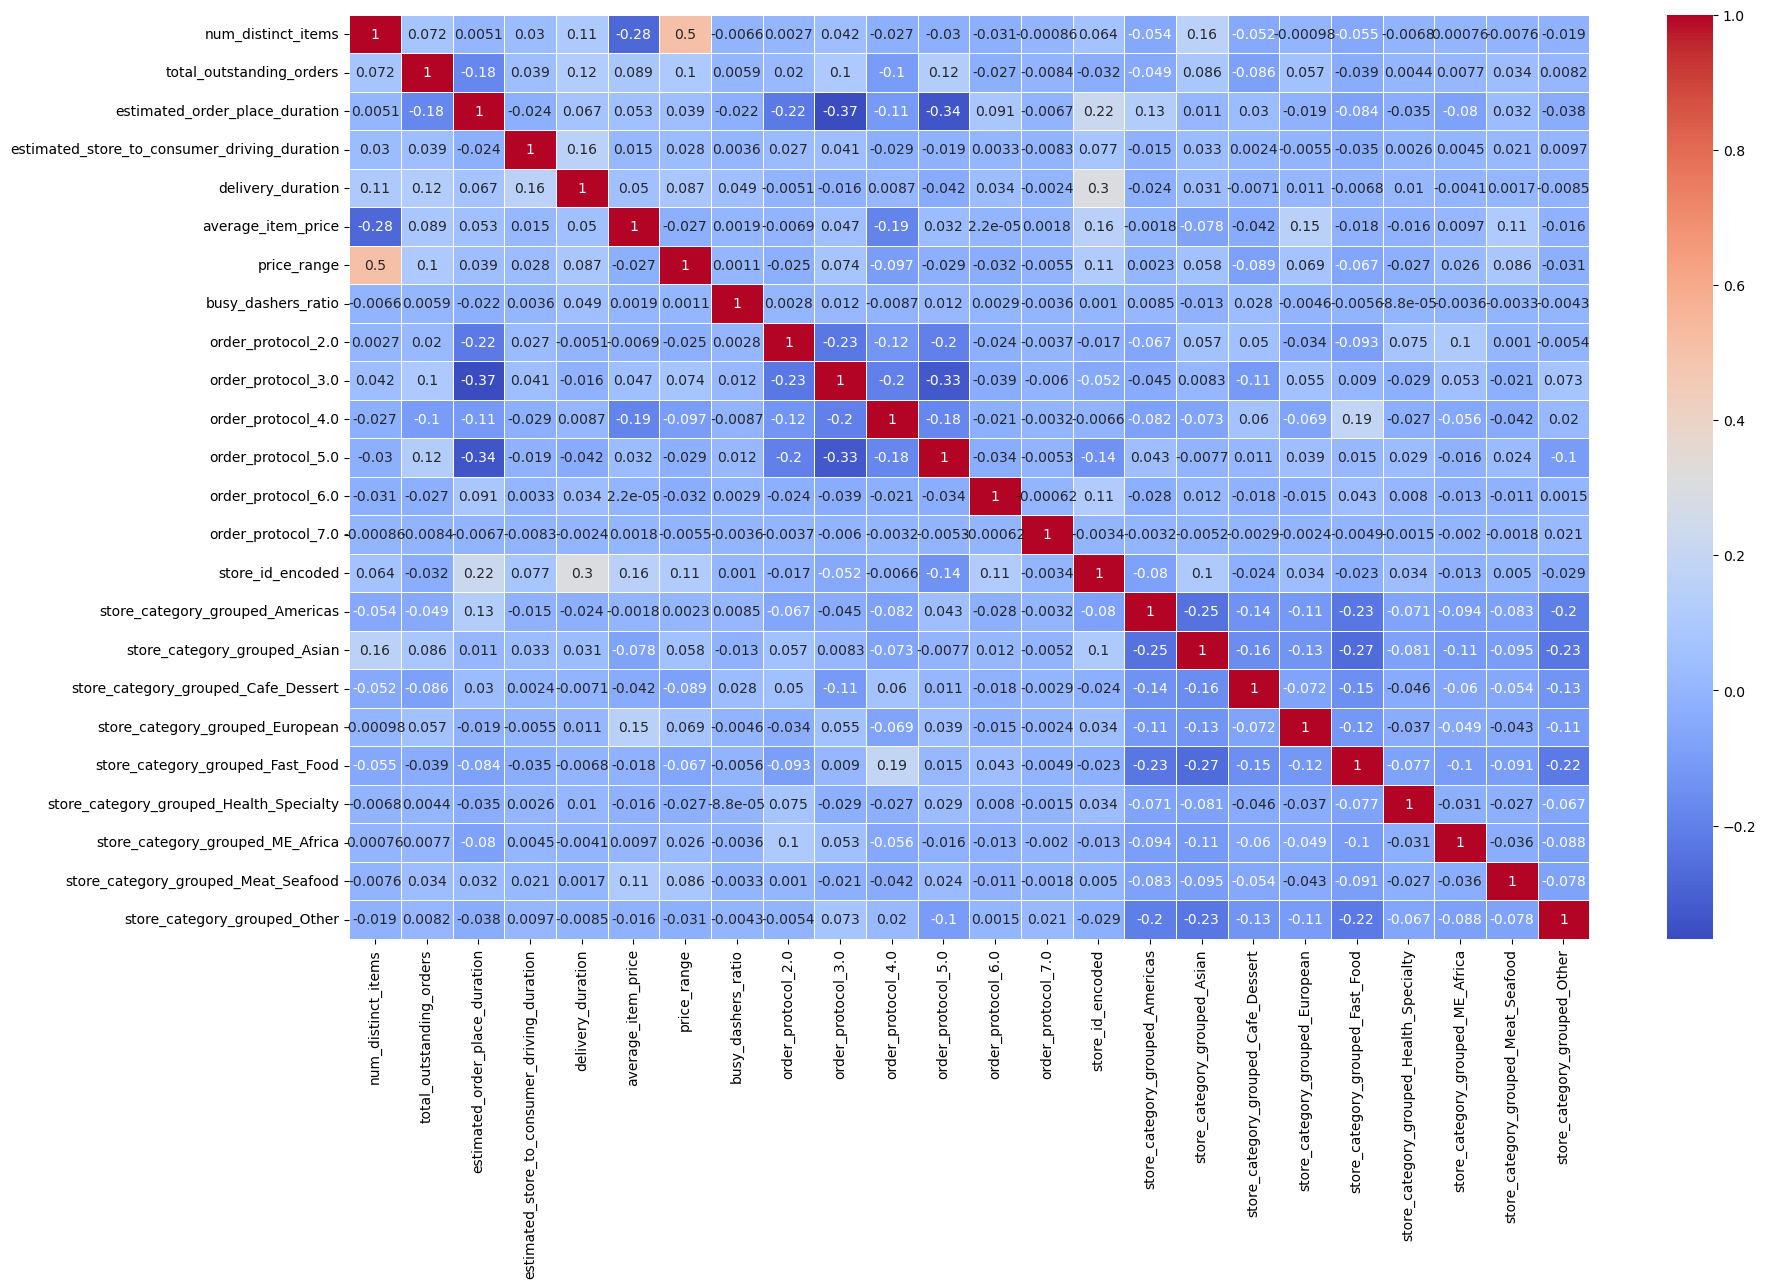

In [239]:
corr_matrix = df2.corr()
plt.figure(figsize = (20,12))
sns.heatmap(corr_matrix, annot=True, cmap = "coolwarm", linewidths = 0.5)

In [240]:
df2 = df2.drop(columns = ['num_distinct_items','store_category_grouped_Other'])

In [243]:
df2.count()

total_outstanding_orders                        172577
estimated_order_place_duration                  172577
estimated_store_to_consumer_driving_duration    172577
delivery_duration                               172577
average_item_price                              172577
price_range                                     172577
busy_dashers_ratio                              169127
order_protocol_2.0                              197428
order_protocol_3.0                              197428
order_protocol_4.0                              197428
order_protocol_5.0                              197428
order_protocol_6.0                              197428
order_protocol_7.0                              197428
store_id_encoded                                172577
store_category_grouped_Americas                 197428
store_category_grouped_Asian                    197428
store_category_grouped_Cafe_Dessert             197428
store_category_grouped_European                 197428
store_cate

In [244]:
df3 = df2.dropna()

In [245]:
df3.count()

total_outstanding_orders                        169127
estimated_order_place_duration                  169127
estimated_store_to_consumer_driving_duration    169127
delivery_duration                               169127
average_item_price                              169127
price_range                                     169127
busy_dashers_ratio                              169127
order_protocol_2.0                              169127
order_protocol_3.0                              169127
order_protocol_4.0                              169127
order_protocol_5.0                              169127
order_protocol_6.0                              169127
order_protocol_7.0                              169127
store_id_encoded                                169127
store_category_grouped_Americas                 169127
store_category_grouped_Asian                    169127
store_category_grouped_Cafe_Dessert             169127
store_category_grouped_European                 169127
store_cate

In [248]:
#Random Forest Regressor

from sklearn.ensemble import RandomForestRegressor

X = df3.drop(columns = ['delivery_duration'])
y = df3['delivery_duration']

X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.3, random_state = 42)

rf_model = RandomForestRegressor(n_estimators = 100, random_state =42)
rf_model.fit(X_train, y_train)

y_pred = rf_model.predict(X_test)

mae = mean_absolute_error(y_test,y_pred)
rmse = mean_squared_error(y_test,y_pred)
r2_score = r2_score(y_test,y_pred)

print("MAE:", mae)
print("RMSE:",rmse)
print("R2_score:",r2_score)

MAE: 686.2414273325958
RMSE: 993113.0385777913
R2_score: 0.2334677230537936


In [255]:
#XGBoost

import xgboost as xgb
from sklearn.metrics import r2_score

X = df3.drop(columns=['delivery_duration'])
y = df3['delivery_duration']

X_train,X_test,y_train,y_test = train_test_split(X,y,test_size = 0.3, random_state=42)

xgb_model = xgb.XGBRegressor(
    n_estimators=100, 
    learning_rate=0.1, 
    max_depth=5, 
    random_state=42
)

xgb_model.fit(X_train, y_train)

y_pred = xgb_model.predict(X_test)

mae = mean_absolute_error(y_test, y_pred)
rmse = mean_squared_error(y_test,y_pred)
r2 = r2_score(y_test, y_pred)

print("MAE:", mae)
print("RMSE:",rmse)
print("R2_score:",r2)

MAE: 666.4822103119603
RMSE: 940989.5611065064
R2_score: 0.2736991230217527


In [260]:
#Neural Network
!pip install tensorflow
from sklearn.preprocessing import StandardScaler

X = df3.drop(columns=['delivery_duration'])
y = df3['delivery_duration']

X_train,X_test,y_train,y_test = train_test_split(X,y,test_size = 0.3, random_state=42)

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

import tensorflow as tf
from tensorflow.keras import layers, models

# 1. Define the architecture
nn_model = models.Sequential([
    layers.Dense(64, activation='relu', input_shape=(X_train.shape[1],)),
    layers.Dense(32, activation='relu'),
    layers.Dense(1) # One output node for the predicted numerical value
])

# 2. Compile the model
# Using 'adam' optimizer and 'mse' loss for regression
nn_model.compile(optimizer='adam', loss='mse', metrics=['mae'])

# 3. Train the model
history = nn_model.fit(
    X_train_scaled, y_train, 
    epochs=50, 
    batch_size=32, 
    validation_split=0.2,
    verbose=0 # Set to 1 to see progress
)

from sklearn.metrics import mean_absolute_error, r2_score

# 4. Predict
y_pred = nn_model.predict(X_test_scaled).flatten()

# 5. Calculate Metrics
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Neural Network MAE: {mae:.2f}")
print(f"Neural Network R2: {r2:.2f}")

   ---------------------------------------- 0.0/332.0 MB ? eta -:--:--
    --------------------------------------- 6.0/332.0 MB 32.2 MB/s eta 0:00:11
   - -------------------------------------- 13.4/332.0 MB 33.4 MB/s eta 0:00:10
   -- ------------------------------------- 20.4/332.0 MB 33.2 MB/s eta 0:00:10
   --- ------------------------------------ 28.6/332.0 MB 34.4 MB/s eta 0:00:09
   ---- ----------------------------------- 34.9/332.0 MB 33.4 MB/s eta 0:00:09
   ---- ----------------------------------- 40.9/332.0 MB 32.4 MB/s eta 0:00:09
   ----- ---------------------------------- 47.7/332.0 MB 32.2 MB/s eta 0:00:09
   ------ --------------------------------- 54.5/332.0 MB 32.3 MB/s eta 0:00:09
   ------- -------------------------------- 60.6/332.0 MB 31.7 MB/s eta 0:00:09
   -------- ------------------------------- 67.4/332.0 MB 31.7 MB/s eta 0:00:09
   -------- ------------------------------- 72.4/332.0 MB 31.0 MB/s eta 0:00:09
   --------- ------------------------------ 76.3/3

C:\Users\soura\anaconda3\Lib\site-packages\keras\src\export\tf2onnx_lib.py:8: FutureWarning: In the future `np.object` will be defined as the corresponding NumPy scalar.
  if not hasattr(np, "object"):
C:\Users\soura\anaconda3\Lib\site-packages\keras\src\layers\core\dense.py:106: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


1586/1586 ━━━━━━━━━━━━━━━━━━━━ 6s 4ms/step
Neural Network MAE: 669.87
Neural Network R2: 0.26
